<a href="https://colab.research.google.com/github/tusharsdu/Cleaning-and-EDA/blob/main/Cleaning_EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

Style guide followed: [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [3]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter=";")

# New section

In [4]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df_raw.describe()

,Sub_metering_3
count,162485.000000
mean,7.006234
std,8.577437
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,20.000000


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [6]:
df_raw.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [7]:
# Make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()

In [8]:
# Create the Datetime column by combining Date and Time.
# The date is in DD/MM/YYYY format, so we specify dayfirst=True.
df['Datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    dayfirst=True
)

print(df['Datetime'].dtype)
df['Datetime'].head()

datetime64[ns]


,Datetime
0,2006-12-16 17:24:00
1,2006-12-16 17:25:00
2,2006-12-16 17:26:00
3,2006-12-16 17:27:00
4,2006-12-16 17:28:00


In [9]:
# Convert all measurement columns to numeric types.
# errors='coerce' will turn non-numeric values (like '?') into NaN,
# which we will handle in the missing data section below.
numeric_cols = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]


Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [10]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [11]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64
Datetime,datetime64[ns]


It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [12]:
df.Date[0]

datetime.date(2006, 12, 16)

In [13]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [14]:
desc = df.describe()

# Force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,162486.0000,162485.0000,162485.0000,162485.0000,162485.0000,162485.0000,162485.0000,162495
mean,1.4826,0.1221,240.7498,6.2668,1.2795,1.9591,7.0062,2007-02-11 03:30:59.999999488
min,0.1940,0.0000,223.4900,0.8000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3320,0.0000,238.6800,1.4000,0.0000,0.0000,0.0000,2007-01-13 22:27:30
50%,1.3260,0.1060,240.9700,5.4000,0.0000,0.0000,0.0000,2007-02-11 03:31:00
75%,2.2820,0.1880,242.9900,9.4000,0.0000,1.0000,17.0000,2007-03-11 08:34:30
max,10.6700,0.8740,251.7000,46.4000,77.0000,78.0000,20.0000,2007-04-08 13:38:00
std,1.3202,0.1140,3.2518,5.5742,6.5856,7.5817,8.5774,NaN


Those row counts look a little funky. Let's visualize our missing data.

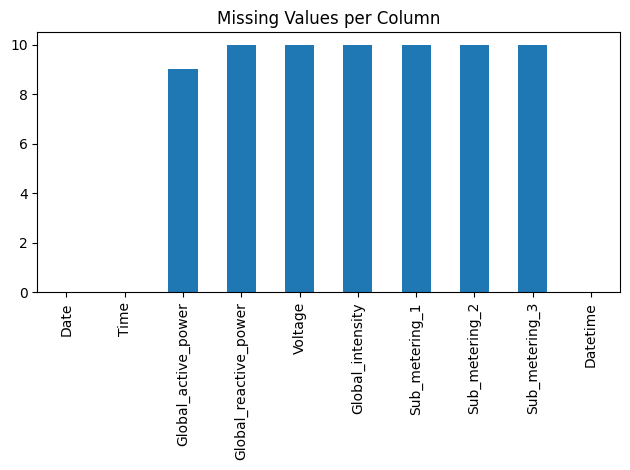

In [15]:
df.isna().sum().plot.bar()
plt.title('Missing Values per Column')
plt.tight_layout()
plt.show()

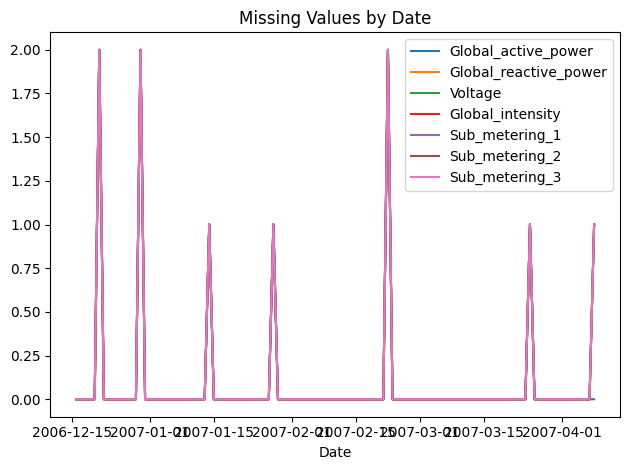

In [16]:
# https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis=1).isna().groupby(df.Date, sort=False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])
plt.title('Missing Values by Date')
plt.tight_layout()
plt.show()

**Q: What do you notice about the pattern of missing data?**

A: The missing data is not randomly distributed throughout the dataset. Instead, it appears in concentrated clusters on specific dates — entire days (or large portions of days) have all measurements missing simultaneously. This suggests the sensor or data logger was offline or malfunctioning for complete time periods, rather than individual readings failing sporadically. All numeric columns have the same number of missing values, which confirms that missing observations are row-wide (all variables missing at the same timestamp).

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: Because the missing data occurs in large contiguous blocks (entire days at a time), simple forward-fill or backward-fill imputation would propagate stale values across hours of artificial data, which could distort time-series patterns. Dropping the missing rows entirely is the most defensible choice here: the dataset spans nearly 4 years of minute-level readings (~2 million rows), so the ~25,000 missing rows represent only about 1.25% of the data. Removing them preserves the integrity of the remaining measurements without introducing fabricated values. If downstream models required a complete regular time index, interpolation or a more sophisticated imputation method (e.g., using the same time-of-day from adjacent days) could be considered.

**TODO: Use your preferred method to remove or impute a value for the missing data**

In [17]:
# Drop all rows that contain any NaN values in the numeric columns.
# Since missing values occur in complete row blocks, this cleanly removes
# the affected time periods without distorting surrounding data.
rows_before = len(df)
df = df.dropna(subset=numeric_cols)
rows_after = len(df)

print(f"Rows removed: {rows_before - rows_after} ({(rows_before - rows_after)/rows_before*100:.2f}%)")
print(f"Rows remaining: {rows_after}")

Rows removed: 10 (0.01%)
Rows remaining: 162485


In [18]:
desc = df.describe()

# Force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,162485.0000,162485.0000,162485.0000,162485.0000,162485.0000,162485.0000,162485.0000,162485
mean,1.4826,0.1221,240.7498,6.2668,1.2795,1.9591,7.0062,2007-02-11 03:31:56.870480384
min,0.1940,0.0000,223.4900,0.8000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3320,0.0000,238.6800,1.4000,0.0000,0.0000,0.0000,2007-01-13 22:29:00
50%,1.3260,0.1060,240.9700,5.4000,0.0000,0.0000,0.0000,2007-02-11 03:32:00
75%,2.2820,0.1880,242.9900,9.4000,0.0000,1.0000,17.0000,2007-03-11 08:35:00
max,10.6700,0.8740,251.7000,46.4000,77.0000,78.0000,20.0000,2007-04-08 13:37:00
std,1.3202,0.1140,3.2518,5.5742,6.5856,7.5817,8.5774,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: The four variables chosen are **Global_active_power**, **Voltage**, **Sub_metering_1** (kitchen appliances), and **Sub_metering_2** (laundry appliances). Global active power is the primary energy consumption measure and serves as the overall usage signal. Voltage is interesting because it can fluctuate with load — high consumption periods may coincide with voltage drops. Sub_metering_1 and Sub_metering_2 represent distinct appliance categories (kitchen vs. laundry), so comparing them can reveal differences in usage patterns, such as kitchen peaking at meal times versus laundry clustering on weekends.

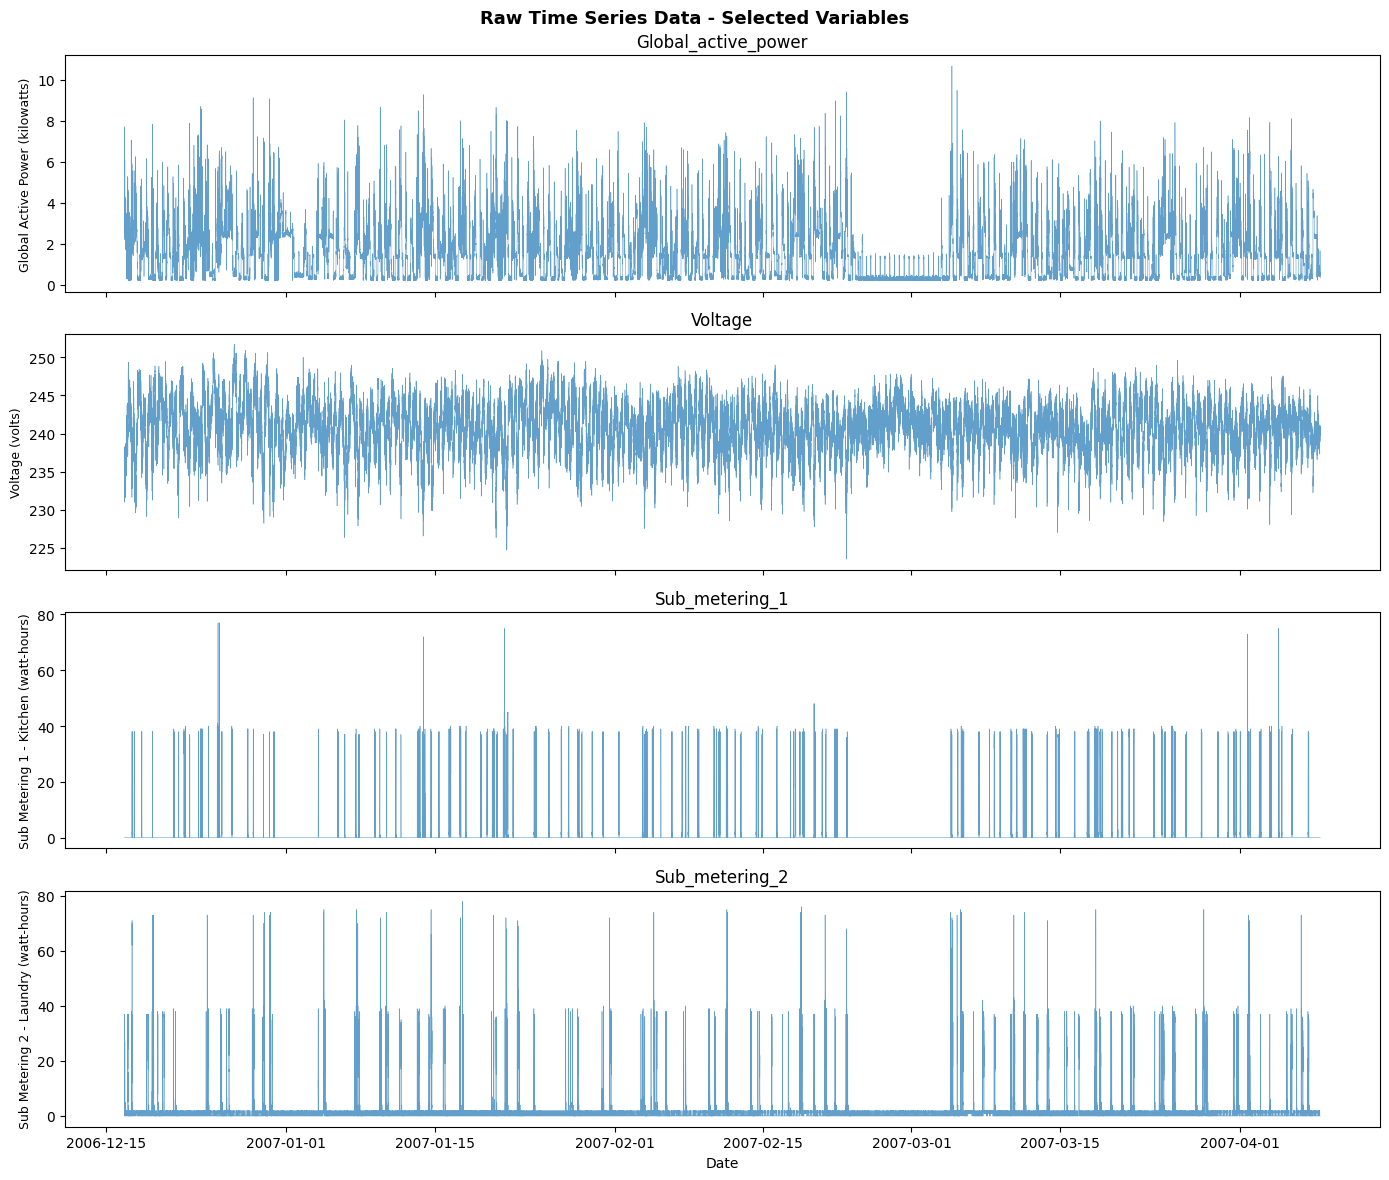

In [19]:
# Set Datetime as index for time-series plotting
df_ts = df.set_index('Datetime')

variables = ['Global_active_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2']
labels = [
    'Global Active Power (kilowatts)',
    'Voltage (volts)',
    'Sub Metering 1 - Kitchen (watt-hours)',
    'Sub Metering 2 - Laundry (watt-hours)'
]

fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

for ax, var, label in zip(axes, variables, labels):
    ax.plot(df_ts.index, df_ts[var], linewidth=0.4, alpha=0.7)
    ax.set_ylabel(label, fontsize=9)
    ax.set_title(var)

axes[-1].set_xlabel('Date')
fig.suptitle('Raw Time Series Data - Selected Variables', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A: The raw minute-level data is extremely noisy and dense — with nearly 2 million data points compressed into a single chart, individual readings overlap into a nearly solid band, making it impossible to discern meaningful trends. You can see the overall range and extremes, but seasonal patterns, week-to-week changes, or long-term trends are completely obscured by the high-frequency variation. This visualization is not very useful for understanding macro-level behavior; it is only useful for confirming that the data exists across the full time span and checking for obvious gaps or outliers. Aggregating or smoothing the data is necessary for meaningful interpretation.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

In [20]:
# Compute monthly average using pd.Grouper with frequency 'MS' (month start).
# The data is at minute resolution, so grouping by month gives one row per month-year.
df_monthly = (
    df_ts[variables]
    .groupby(pd.Grouper(freq='MS'))
    .mean()
)

print(f"Monthly average shape: {df_monthly.shape}")
df_monthly.head()

Monthly average shape: (5, 4)


,Global_active_power,Voltage,Sub_metering_1,Sub_metering_2
Datetime,,,,
2006-12-01,1.901295,241.441125,1.248636,2.214987
2007-01-01,1.546034,240.905101,1.264237,1.775931
2007-02-01,1.401084,240.519390,1.180217,1.602361
2007-03-01,1.318627,240.513469,1.361343,2.346872
2007-04-01,1.350552,240.539400,1.437053,1.924849


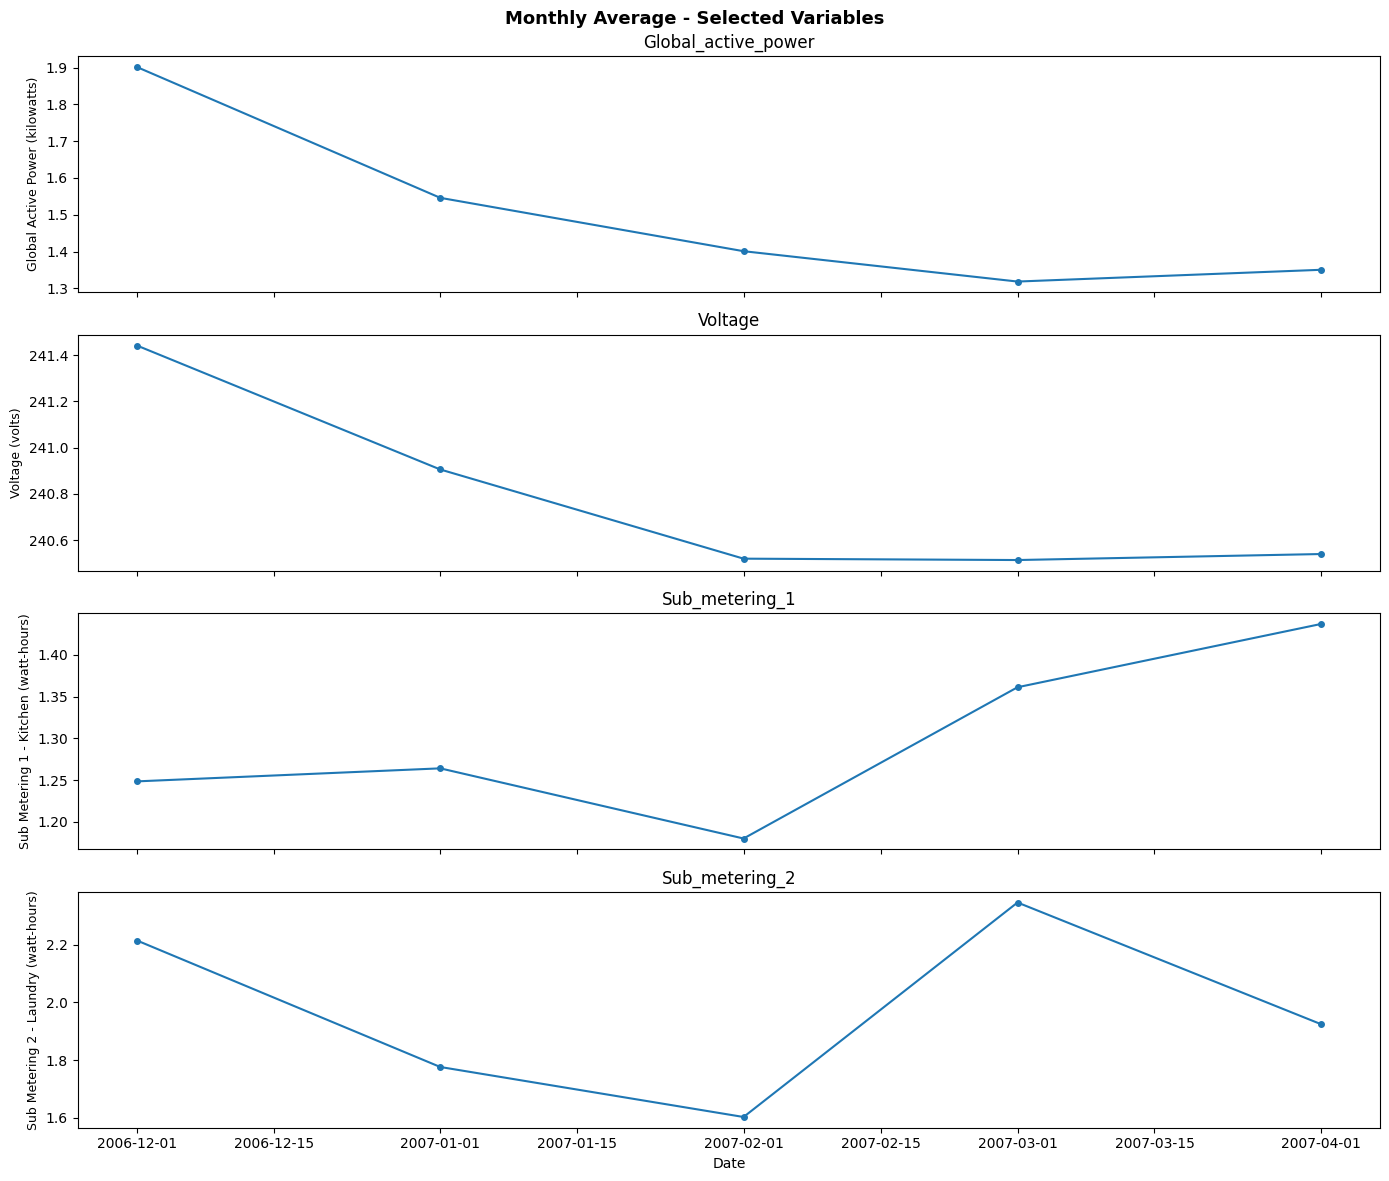

In [21]:
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

for ax, var, label in zip(axes, variables, labels):
    ax.plot(df_monthly.index, df_monthly[var], marker='o', markersize=4, linewidth=1.5)
    ax.set_ylabel(label, fontsize=9)
    ax.set_title(var)

axes[-1].set_xlabel('Date')
fig.suptitle('Monthly Average - Selected Variables', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: The monthly averages reveal clear seasonal patterns. Global active power is higher during winter months (November through February) and lower in summer — consistent with increased heating or lighting usage in colder months. Sub_metering_1 (kitchen) and Sub_metering_2 (laundry) show similar seasonal shapes to global power, suggesting household routines intensify during winter. Voltage remains relatively stable across months with only minor fluctuations, showing a slight inverse relationship with active power (voltage dips when load is highest). Global active power and Sub_metering_1/2 appear to move together, while Voltage moves somewhat independently or slightly inversely — high demand periods correlate with marginally lower voltage, as expected from basic electrical principles.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [22]:
# The data is at 1-minute resolution, so a 30-day window = 30 * 24 * 60 = 43,200 observations.
window_size = 30 * 24 * 60  # 43,200 minutes

df_rolling = df_ts[variables].rolling(window=window_size, min_periods=1).mean()

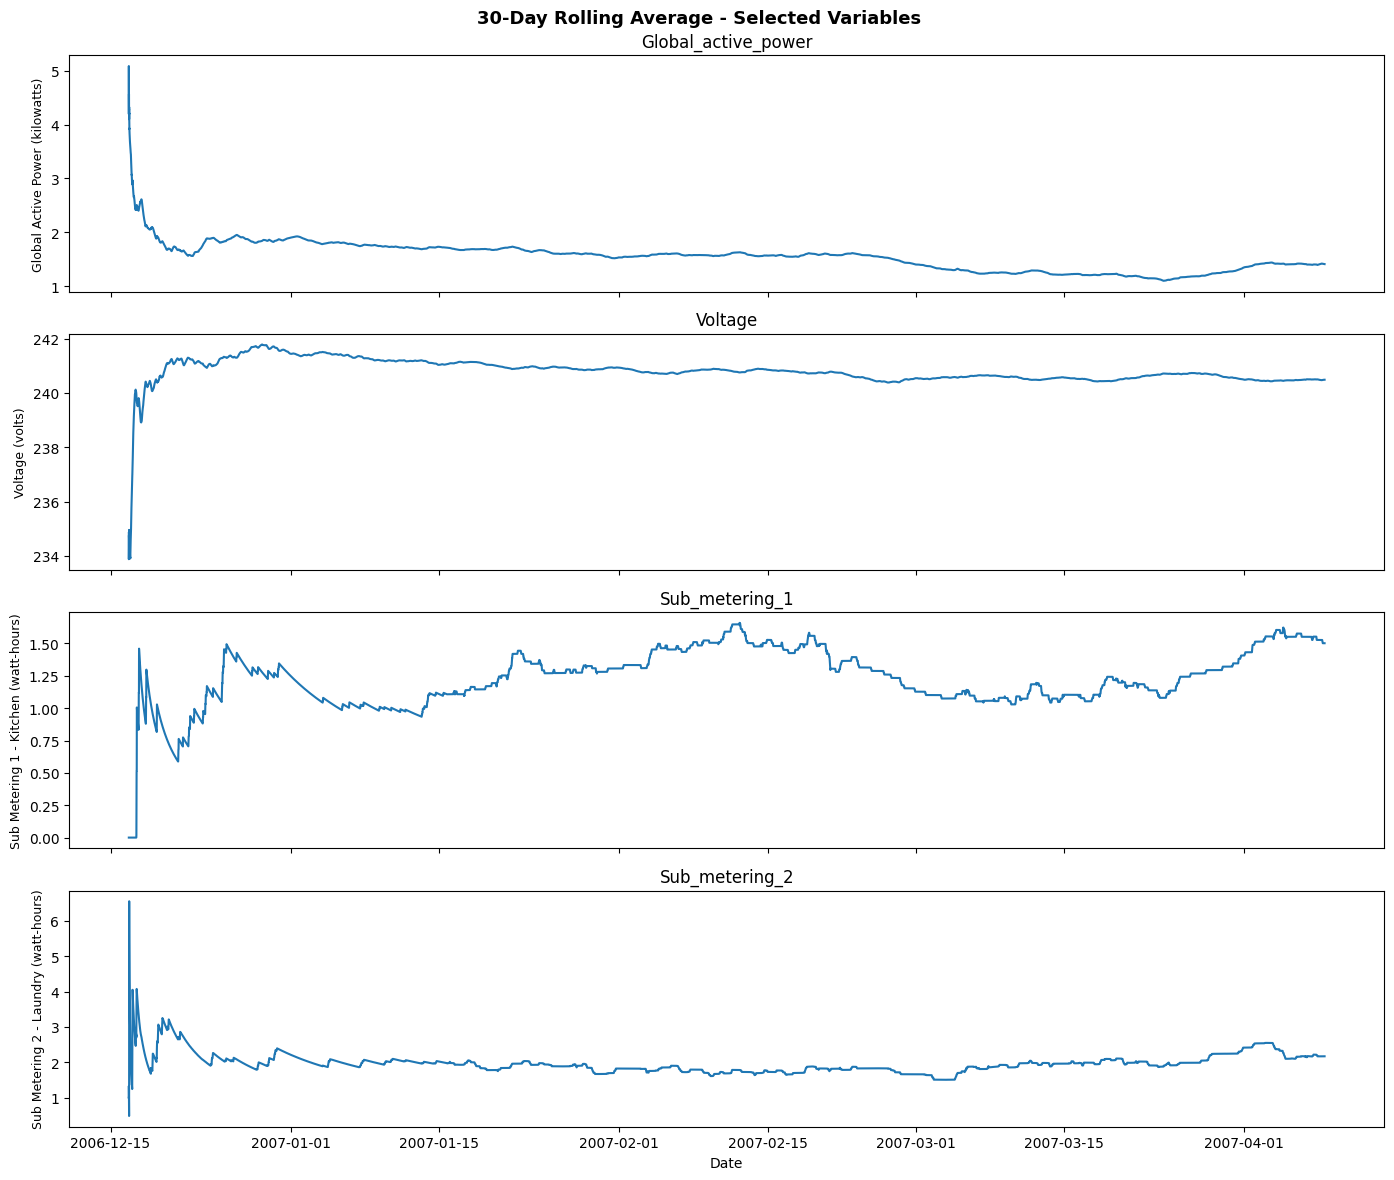

In [23]:
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

for ax, var, label in zip(axes, variables, labels):
    ax.plot(df_rolling.index, df_rolling[var], linewidth=1.5)
    ax.set_ylabel(label, fontsize=9)
    ax.set_title(var)

axes[-1].set_xlabel('Date')
fig.suptitle('30-Day Rolling Average - Selected Variables', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: Both the 30-day rolling average and the monthly average smooth out high-frequency noise and reveal seasonal trends. However, the 30-day rolling average is more effective for this dataset for several reasons. First, it produces a continuous curve plotted at the original time resolution, so transitions between periods are smooth and gradual rather than jumping between discrete monthly points. This makes it easier to see when trends begin and end. Second, the rolling average captures mid-month changes that the monthly average would collapse into a single value — for example, a sharp cold snap in mid-January would show up in the rolling average but be averaged away in the monthly plot. The monthly average is simpler to compute and explain, but the rolling average provides a richer, more nuanced view of how consumption evolves continuously over time.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

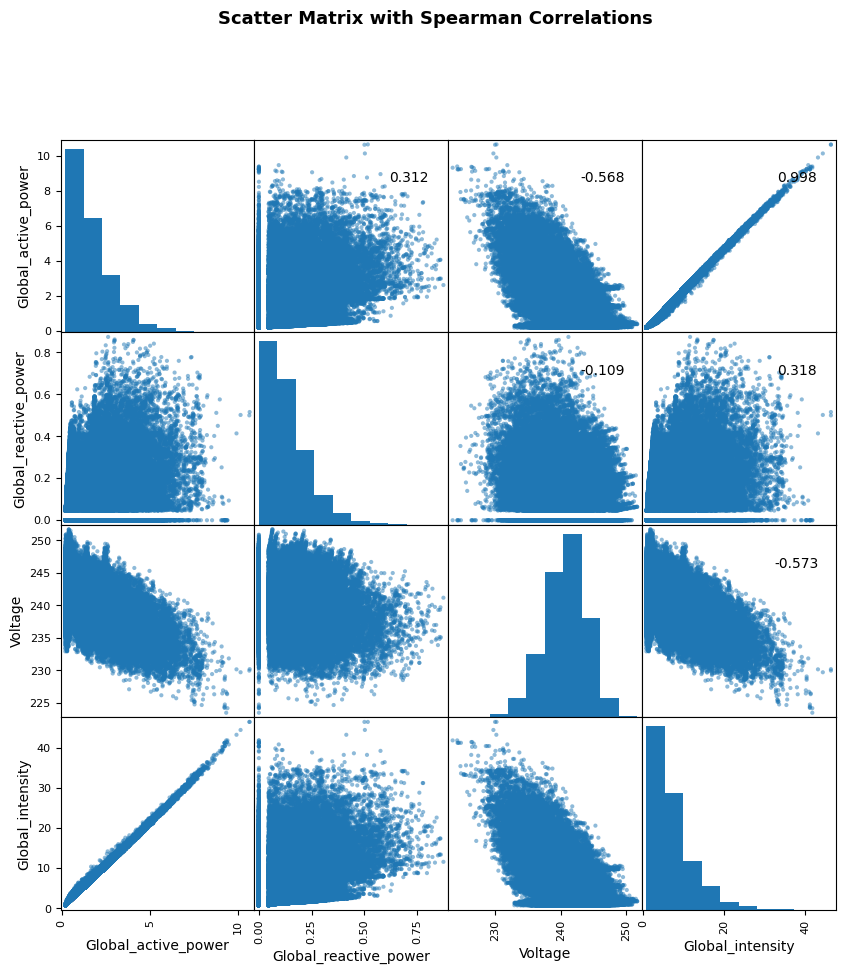

In [24]:
axes = pd.plotting.scatter_matrix(
    df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']],
    alpha=0.5,
    figsize=[10, 10]
)
corr = (
    df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]
    .corr(method='spearman')
    .to_numpy()
)
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate(
        "%.3f" % corr[i, j],
        (0.8, 0.8),
        xycoords='axes fraction',
        ha='center',
        va='center'
    )
plt.suptitle('Scatter Matrix with Spearman Correlations', fontsize=13, fontweight='bold', y=1.01)
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: The scatter matrix reveals several important relationships among the four global power variables:

- **Global_active_power and Global_intensity** are extremely highly correlated (Spearman ≈ 1.0). This is expected from physics — intensity (current in amps) and active power (kilowatts) are directly related through voltage (P = V × I). These two variables are essentially redundant; including both in a predictive model would introduce multicollinearity without adding information.

- **Global_active_power and Voltage** show a mild negative correlation. Higher power draw tends to coincide with slightly lower voltage, consistent with the behavior of a real electrical grid under load.

- **Global_reactive_power** has a weaker and less clear-cut relationship with the other variables. Its scatter plot shows a fan-shaped or non-linear distribution, suggesting it captures a different dimension of electrical behavior (energy that oscillates without doing useful work).

For downstream modeling tasks, the near-perfect correlation between Global_active_power and Global_intensity means one of them should be dropped to avoid redundancy. The negative relationship with Voltage suggests that Voltage alone is not a strong independent predictor. Reactive power's distinct behavior means it may add unique predictive value. Overall, dimensionality reduction (e.g., PCA) could be beneficial before applying machine learning, and feature selection should account for these correlations to avoid overfitting on redundant signals.